In [14]:
### 1 . Understanding dataset
# --------------------------------
# mpg - Miles per Gallon
# cyl - # of cylinders
# disp - displacement, in cubic inches
# hp - horsepower
# drat - driveshaft ratio (don't really KNOW cars, so if you've got questions - you know what to do. :-D
# wt - weight
# qsec - 1/4 mile time; a measure of acceleration
# vs - 'V' or straight - engine shape
# am - transmission; auto or manual
# gear - # of gears
# carb - # of carburetors.

In [2]:
### 2.import lib and show dataFra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import scipy.stats as stats
import joblib

df = pd.read_csv(r'dataset\mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
### 2. Drop model column and create correlation matrix
df_correl = df.drop(df.columns[0], axis=1)
correlation_matrix = df_correl.corr()
correlation_matrix.round(3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000,-0.852,-0.848,-0.776,0.681,-0.868,0.419,0.664,0.600,0.480,-0.551
cyl,-0.852,1.000,0.902,0.832,-0.700,0.782,-0.591,-0.811,-0.523,-0.493,0.527
disp,-0.848,0.902,1.000,0.791,-0.710,0.888,-0.434,-0.710,-0.591,-0.556,0.395
hp,-0.776,0.832,0.791,1.000,-0.449,0.659,-0.708,-0.723,-0.243,-0.126,0.750
drat,0.681,-0.700,-0.710,-0.449,1.000,-0.712,0.091,0.440,0.713,0.700,-0.091
wt,-0.868,0.782,0.888,0.659,-0.712,1.000,-0.175,-0.555,-0.692,-0.583,0.428
qsec,0.419,-0.591,-0.434,-0.708,0.091,-0.175,1.000,0.745,-0.230,-0.213,-0.656
vs,0.664,-0.811,-0.710,-0.723,0.440,-0.555,0.745,1.000,0.168,0.206,-0.570
am,0.600,-0.523,-0.591,-0.243,0.713,-0.692,-0.230,0.168,1.000,0.794,0.058
gear,0.480,-0.493,-0.556,-0.126,0.700,-0.583,-0.213,0.206,0.794,1.000,0.274


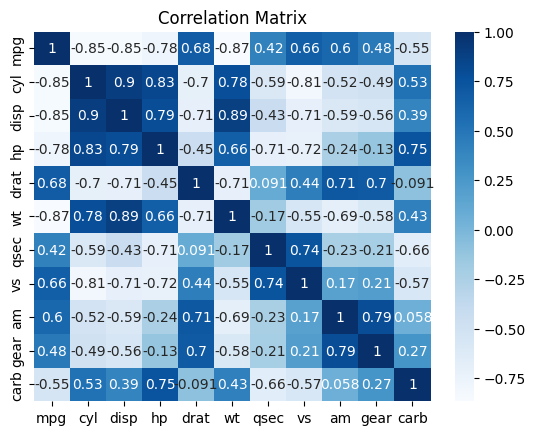

In [ ]:
### 3. Create heatmap from correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

(1, 11)


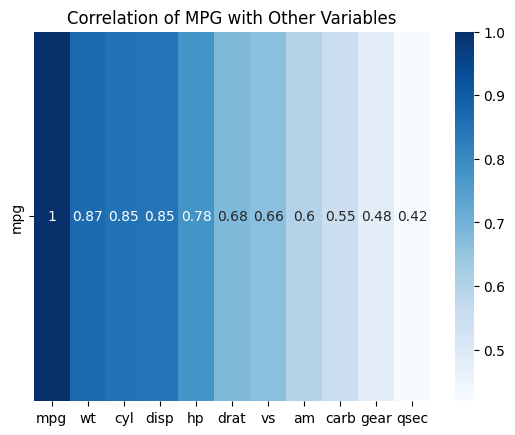

In [ ]:
### 4. Correlation of MPG with Other Variables
df_correl_mpg = np.abs(correlation_matrix['mpg']).sort_values(ascending=False)
df_heatmap = df_correl_mpg.values.reshape(1, -1)
print(df_heatmap.shape)

# Create the heatmap
sns.heatmap(df_heatmap, annot=True, cmap='Blues', xticklabels=df_correl_mpg.index, yticklabels=['mpg'])
plt.title('Correlation of MPG with Other Variables')
plt.show()

In [ ]:
### top 6 variable to strong correlation 
df_top6_correl = df_correl_mpg[1:].head(6)
print(df_top6_correl)
print('-'*30)
df_top6_correl_idx = df_top6_correl.index
print(df_top6_correl_idx)

wt      0.867659
cyl     0.852162
disp    0.847551
hp      0.776168
drat    0.681172
vs      0.664039
Name: mpg, dtype: float64
------------------------------
Index(['wt', 'cyl', 'disp', 'hp', 'drat', 'vs'], dtype='object')


In [ ]:
### 5.Using stat (p-value)
data = []
for idx in df_top6_correl_idx:
  correlation_coefficient, p_value = stats.pearsonr(df['mpg'], df[idx])
  print(f"correlation between mpg vs {idx} : {correlation_coefficient.round(3)}")
  print(f"P-value for mpg vs {idx} : {p_value}")
  print('-'*30)

  data.append([idx, correlation_coefficient, p_value])
  df_correl_pvalue = pd.DataFrame(data, columns=['Variable', 'Correlation Coefficient', 'P-value'])
  df_correl_pvalue = df_correl_pvalue.set_index('Variable')
df_correl_pvalue

correlation between mpg vs wt : -0.868
P-value for mpg vs wt : 1.293958701350513e-10
------------------------------
correlation between mpg vs cyl : -0.852
P-value for mpg vs cyl : 6.112687142581097e-10
------------------------------
correlation between mpg vs disp : -0.848
P-value for mpg vs disp : 9.380326537381379e-10
------------------------------
correlation between mpg vs hp : -0.776
P-value for mpg vs hp : 1.7878352541210675e-07
------------------------------
correlation between mpg vs drat : 0.681
P-value for mpg vs drat : 1.776239928752415e-05
------------------------------
correlation between mpg vs vs : 0.664
P-value for mpg vs vs : 3.415937254419958e-05
------------------------------


,Correlation Coefficient,P-value
Variable,,
wt,-0.867659,1.293959e-10
cyl,-0.852162,6.112687e-10
disp,-0.847551,9.380327e-10
hp,-0.776168,1.787835e-07
drat,0.681172,1.776240e-05
vs,0.664039,3.415937e-05


wt : (slope = -5.344 , intercept = 37.285)
cyl : (slope = -2.876 , intercept = 37.885)
disp : (slope = -0.041 , intercept = 29.6)
hp : (slope = -0.068 , intercept = 30.099)
drat : (slope = 7.678 , intercept = -7.525)
vs : (slope = 7.94 , intercept = 16.617)


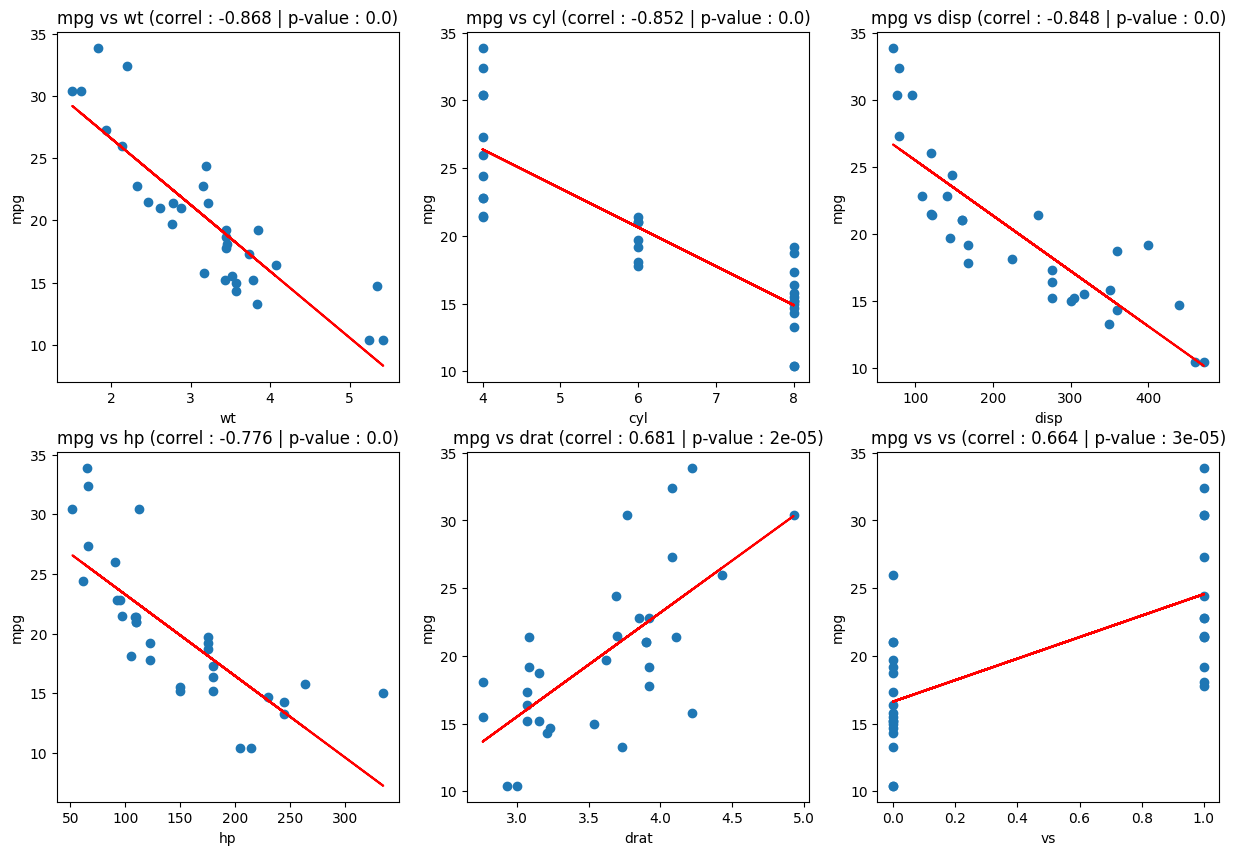

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
for i, idx in enumerate(df_top6_correl_idx):
    axs[i].scatter(df[idx], df['mpg'])  # Create scatter plot in each subplot
    axs[i].set_xlabel(idx)  # Set x-axis label
    axs[i].set_ylabel('mpg')  # Set y-axis label
    axs[i].set_title(f"mpg vs {idx} (correl : {df_correl_pvalue['Correlation Coefficient'][idx].round(3)} | p-value : {df_correl_pvalue['P-value'][idx].round(5)})")

    m, b = np.polyfit(df[idx], df['mpg'], 1)
    print(f"{idx} : (slope = {m.round(3)} , intercept = {b.round(3)})")
    axs[i].plot(df[idx], m*df[idx] + b, color = 'red')

plt.show()

In [ ]:
### 6. Split dataset for train and test model
X = df[df_top6_correl_idx]
Y = df[['mpg']]
# print(Y)
# print(X)
data_train, data_test = [], []

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# print(X_train.index, y_train.index)
data_train = pd.concat([y_train, X_train], axis=1)
data_train["Model"] = df.loc[X_train.index, 'model']
data_train

,mpg,wt,cyl,disp,hp,drat,vs,Model
16,14.7,5.345,8,440.0,230,3.23,0,Chrysler Imperial
0,21.0,2.620,6,160.0,110,3.90,0,Mazda RX4
23,13.3,3.840,8,350.0,245,3.73,0,Camaro Z28
27,30.4,1.513,4,95.1,113,3.77,1,Lotus Europa
2,22.8,2.320,4,108.0,93,3.85,1,Datsun 710
29,19.7,2.770,6,145.0,175,3.62,0,Ferrari Dino
18,30.4,1.615,4,75.7,52,4.93,1,Honda Civic
12,17.3,3.730,8,275.8,180,3.07,0,Merc 450SL
11,16.4,4.070,8,275.8,180,3.07,0,Merc 450SE
22,15.2,3.435,8,304.0,150,3.15,0,AMC Javelin


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test).round(3) # y_pred -> list

# y_pred -> dataframe
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=["Predicted"])
data_test = pd.concat([y_test, y_pred_df], axis=1)
data_test.columns = ["Actual", "Predicted"]
data_test["Error"] = abs(data_test["Actual"] - data_test["Predicted"])
data_test["Model"] = df.loc[y_test.index, 'model']
data_test = data_test[["Model", "Actual", "Predicted", "Error"]]

data_test

,Model,Actual,Predicted,Error
5,Valiant,18.1,19.942,1.842
17,Fiat 128,32.4,26.331,6.069
24,Pontiac Firebird,19.2,16.980,2.220
1,Mazda RX4 Wag,21.0,21.436,0.436
21,Dodge Challenger,15.5,17.496,1.996
23,Camaro Z28,13.3,15.275,1.975
14,Cadillac Fleetwood,10.4,12.044,1.644


In [11]:
print(f"Intercept (b0): {model.intercept_}")
print(f"Coefficients (b1, b2, ...): {model.coef_}")
inter = model.intercept_[0].round(3)
coef = model.coef_[0].round(3)

joblib.dump(model, 'mtcars_linear_reg.pkl')

print("-"*30)
print(f"y = {coef[0]}X0 + {coef[1]}X1 + {coef[2]}X2 + {coef[3]}X3 + {coef[4]}X4 + {inter}")

Intercept (b0): [35.53489739]
Coefficients (b1, b2, ...): [[-3.59911973 -0.96475442  0.01214334 -0.02190256  0.64200637  0.44372093]]
------------------------------
y = -3.599X0 + -0.965X1 + 0.012X2 + -0.022X3 + 0.642X4 + 35.535


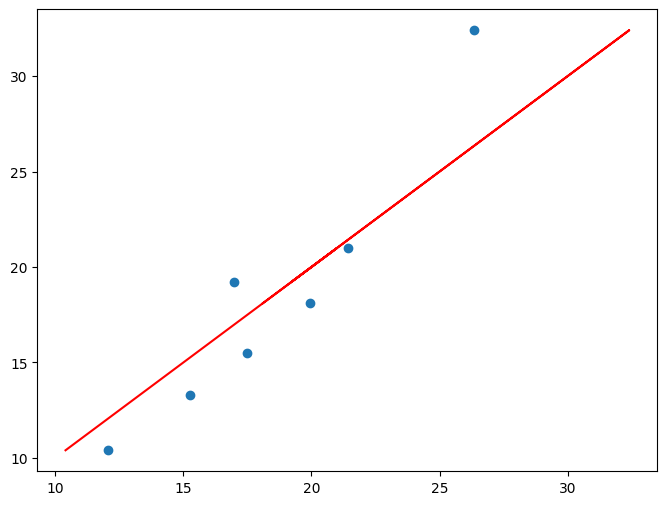

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test)
plt.plot(y_test, y_test , color = 'red')

In [13]:
# คำนวณค่าความคลาดเคลื่อน (Mean Squared Error) และค่า R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse.round(3)}")
print(f"R² Score: {round(r2, 3)}")

Mean Squared Error: 7.99
R² Score: 0.815
